In [67]:
#Importing necessary Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [69]:
data=pd.read_csv("E:/Sankhyana Consultancy/MachineLearning/FuelConsumptionCo2.csv")
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [71]:
data.shape

(1067, 13)

In [73]:
data.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [75]:
data.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [77]:
fuel= data [['ENGINESIZE','CO2EMISSIONS']]
fuel.head()

,ENGINESIZE,CO2EMISSIONS
0,2.0,196
1,2.4,221
2,1.5,136
3,3.5,255
4,3.5,244


In [79]:
fuel.describe()

,ENGINESIZE,CO2EMISSIONS
count,1067.000000,1067.000000
mean,3.346298,256.228679
std,1.415895,63.372304
min,1.000000,108.000000
25%,2.000000,207.000000
50%,3.400000,251.000000
75%,4.300000,294.000000
max,8.400000,488.000000


plotting a histogram of the input and output features

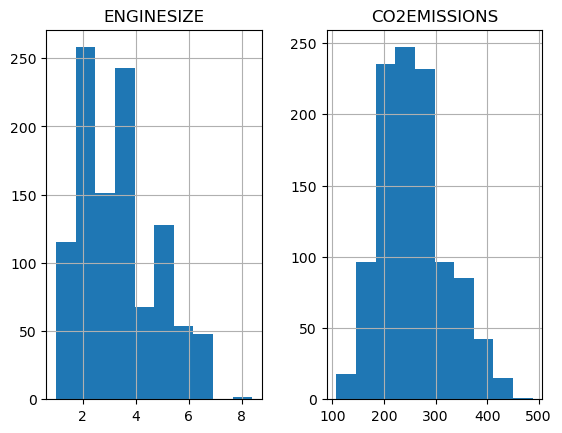

In [82]:
visual=fuel
visual.hist()
plt.show()

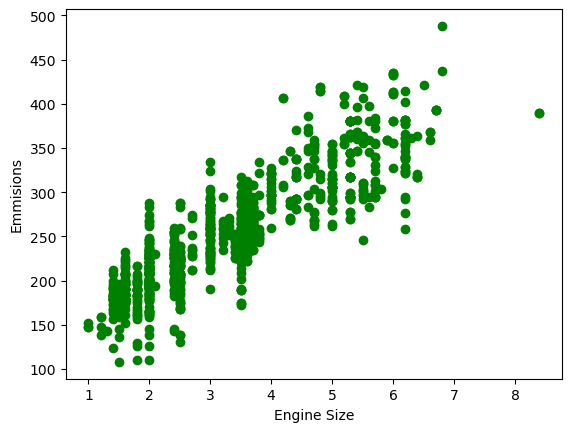

In [84]:
#Plotting a scatter plot  of Engine size Vs CO2 emmission
plt.scatter(fuel.ENGINESIZE, fuel.CO2EMISSIONS, color='green')
plt.xlabel('Engine Size')
plt.ylabel('Emmisions')
plt.show()

In [86]:
#Splitting the dataset to training and testing sets
train= data[: (int((len(data)*0.8)))]
train.shape

(853, 13)

In [88]:
test=data[(int((len(data)*0.8))):]
test.shape

(214, 13)

Training the model

In [91]:
regr= linear_model.LinearRegression()
train_x=np.array(train[['ENGINESIZE']])
train_y=np.array(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)
print("Coefficient",regr.coef_)
print("intercept", regr.intercept_)

Coefficient [[38.79512384]]
intercept [127.16989951]


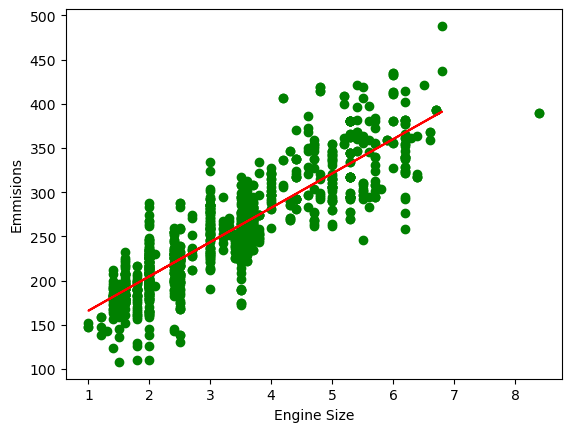

In [99]:
#Plotting a scatter plot with a line of best fit
plt.scatter(fuel.ENGINESIZE, fuel.CO2EMISSIONS, color='green')
plt.plot(train_x, regr.coef_*train_x+regr.intercept_, color='red')
plt.xlabel('Engine Size')
plt.ylabel('Emmisions')
plt.show()

In [101]:
#Creating the predictive function
def get_regression_prediction (input_features, intercept, slope):
    predicted_values=input_features*slope+intercept
    return predicted_values

In [103]:
my_engine_size=8
estimated_emmision=get_regression_prediction(my_engine_size,regr.intercept_,   regr.coef_)
estimated_emmision

array([[437.5308902]])

Evaluating the Model's Accuracy

In [105]:
from sklearn.metrics import r2_score
test_x = np.array(test[['ENGINESIZE']])
test_y = np.array(test[['CO2EMISSIONS']])
# Predicting the target values for the test set using the predictive function
slope = regr.coef_[0][0]  # Extracting the slope from the model
intercept = regr.intercept_[0]  # Extracting the intercept from the model
y_pred = get_regression_prediction(test_x, intercept, slope)
# Calculating the R² score
r2 = r2_score(test_y, y_pred)
# Displaying the results
print(f"R² Score: {r2}")
print(f"The percentage accuracy of the model is {r2*100} %")


R² Score: 0.7861345372905517
The percentage accuracy of the model is 78.61345372905517 %
